[ 2  1  5  4  3  1  5  2 10 27]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


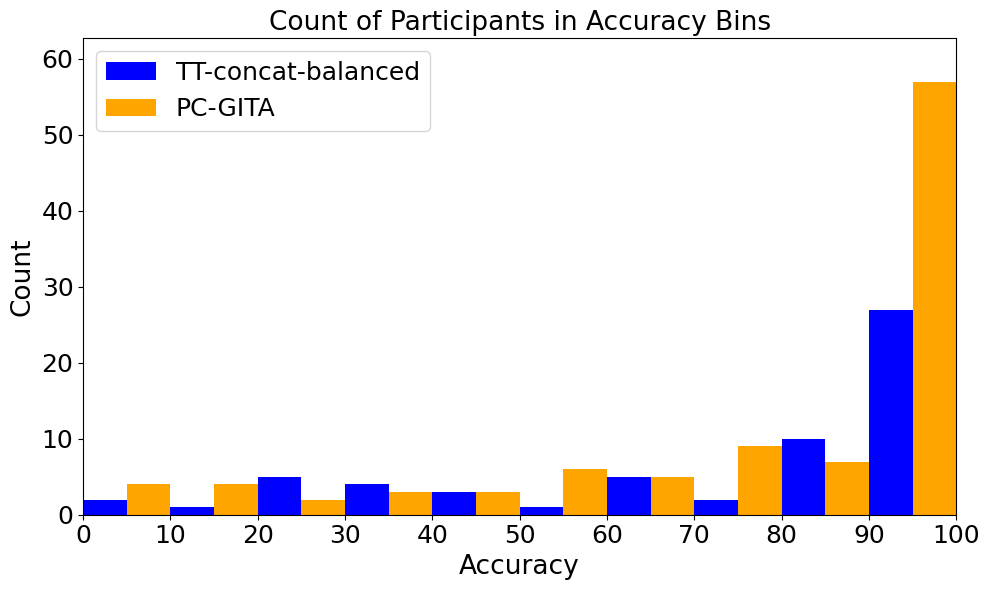

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_two_accuracy_histograms_side_by_side(csv_file1, csv_file2, output_file):
    # Load both CSV files
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    
    # Define bins (assuming accuracy is between 0 and 1)
    bins = np.linspace(0, 100, 11)
    # Compute histogram counts for each dataset
    counts1, bin_edges = np.histogram(df1['accuracy_avg'], bins=bins)
    print(counts1)
    print(bin_edges)
    counts2, _ = np.histogram(df2['accuracy_avg'], bins=bins)
    
    # Calculate midpoints of the bins
    midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Plot bars side-by-side for each bin
    plt.bar(midpoints - bin_width/4, counts1, width=bin_width/2, label='TT-concat-balanced', color='blue', align='center')
    plt.bar(midpoints + bin_width/4, counts2, width=bin_width/2, label='PC-GITA', color='orange', align='center')
    
    # Set x and y limits
    plt.xlim(0, 1)
    plt.ylim(0, max(counts1.max(), counts2.max()) * 1.1)
    
    # Set text sizes and labels
    plt.xlabel('Accuracy', fontsize=19)
    plt.ylabel('Count', fontsize=19)
    plt.title('Count of Participants in Accuracy Bins', fontsize=19)
    plt.xticks(np.linspace(0, 100, 11), fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    plt.close()

# Example file paths

csv_file1 = os.path.join('res_avg5', 'Multimodal_WS_tt_balanced_merged_random_avg5.csv')
csv_file2 = os.path.join('res_avg5', 'Multimodal_WS_replicate_avg5.csv')

output_file = os.path.join('res_avg5', 'accuracy_distribution_histogram_side_by_side.png')

plot_two_accuracy_histograms_side_by_side(csv_file1, csv_file2, output_file)